In [2]:
from typing import Tuple, List
from itertools import combinations, permutations
from math import factorial

from skimage import measure
from skimage import filters
import numpy as np
import matplotlib.pyplot as plt
from skimage import segmentation
from skimage.feature import corner_harris, corner_peaks, corner_subpix
from skimage.morphology import convex_hull_image
from PIL import Image
from scipy import ndimage
from tqdm import tqdm

from src.utils import *
from src.heap import Heap

In [3]:
import random

In [4]:
def num_combinations(n, k):
    return factorial(n) // factorial(n - k) // factorial(k)

In [5]:
image = load_image("images/Пазл-монохром.jpg")

In [6]:
segmented = segmentation.felzenszwalb(image, scale=1000, min_size=image.height * image.width // 200)

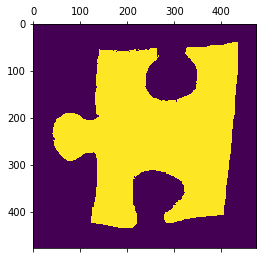

In [10]:
cutout = get_cutout(segmented == 3)
plt.matshow(cutout)

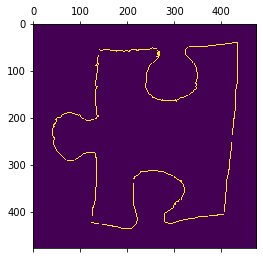

In [11]:
boundaries = segmentation.boundaries.find_boundaries(cutout)
plt.matshow(boundaries)

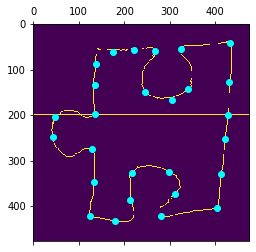

In [23]:
corners = corner_peaks(corner_harris(boundaries), min_distance=35, num_peaks=50)
fig, ax = plt.subplots()
ax.plot(corners[:, 1], corners[:, 0], color='cyan', marker='o', linestyle='None', markersize=6)
boundaries[200] = 2
ax.matshow(boundaries)

In [13]:
# for k, quad in tqdm(enumerate(combinations(corners, 4)), total=num_combinations(len(corners), 4)):
#     zeros = np.zeros_like(cutout)
#     for p in quad:
#         zeros[p[0], p[1]] = 1
#     chull = convex_hull_image(zeros)
#   boundariesshow(chull)
#     print(np.sum(chull * cutout))
#     if k == 10:
#         break

In [14]:
def rectangledness(points: Tuple[np.array]) -> Tuple[float, np.array]:
    assert len(points) == 4
    best_cos = 6
    best_perm = None
    for perm in permutations(points):
        cur_cos = get_angle_cos(np.array([perm[0], perm[1], perm[2]])) +  \
        get_angle_cos(np.array([perm[1], perm[2], perm[3]])) + \
        get_angle_cos(np.array([perm[2], perm[3], perm[0]])) + \
        get_angle_cos(np.array([perm[3], perm[0], perm[1]]))
        if cur_cos < best_cos:
            best_cos = cur_cos
            best_perm = perm
    return best_cos, best_perm

def find_best_rectangle(points: List[Tuple[np.array]]) -> Tuple[float, np.array]:
    points = list(map(rectangledness, points))
    return sorted(points, key=lambda x: x[0])[0][1]

def find_rectangle_candidate(cutout: np.array, points: np.array, candidate_limit: int = 100) -> np.array:
    heap = Heap()
    for quad in tqdm(combinations(points, 4), total=num_combinations(len(points), 4)):
        zeros = np.zeros_like(cutout)
        for p in quad:
            zeros[p[0], p[1]] = 1
        chull = convex_hull_image(zeros)
        space_part = np.sum(chull * cutout)
        heap.insert((space_part, quad))
    best_space, _ = heap.peek()
    retlist = []
    total = 0
    while total < candidate_limit and heap.peek()[0] >= 0.8 * best_space:
        space, cur_points = heap.pop()
        retlist.append(cur_points)
    return find_best_rectangle(retlist)

In [15]:
rectangle = find_rectangle_candidate(cutout, corners, candidate_limit=5)

  6%|▋         | 1131/17550 [00:07<01:47, 152.10it/s]


KeyboardInterrupt: 

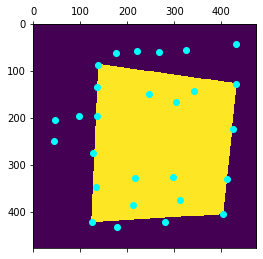

In [80]:
zeros = np.zeros_like(cutout)
for p in rectangle:
    zeros[p[0], p[1]] = 1
plt.matshow(convex_hull_image(zeros))
plt.plot(corners[:, 1], corners[:, 0], color='cyan', marker='o', linestyle='None', markersize=6)

In [86]:
num_combinations(22, 4)

7315

In [81]:
len(corners)

27

In [69]:
rectangle

(array([ 42, 334]), array([206, 490]), array([401, 257]), array([222,  93]))

In [68]:
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw 
from PIL import ImageColor

img = Image.open("tst.png")
draw = ImageDraw.Draw(img)
# font = ImageFont.truetype(<font-file>, <font-size>)
# draw.text((x, y),"Sample Text",(r,g,b))
draw.text((img.height // 2, img.width // 2), "Sample Text", (255, 255, 255))
img.show()

TypeError: function takes exactly 1 argument (3 given)

In [26]:
img.save("tst.png")

In [31]:
img.show()

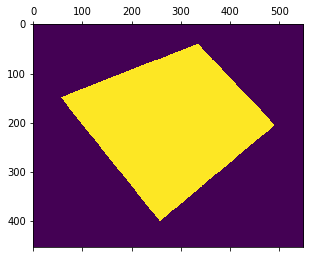

In [15]:
zeros = np.zeros_like(cutout)
for p in retlist[0]:
    zeros[p[0], p[1]] = 1
plt.matshow(convex_hull_image(zeros))

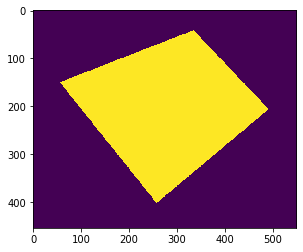

In [24]:
fig, ax = plt.subplots()

ax.imshow(cutout)
ax.imshow(convex_hull_image(zeros))

In [14]:
np.sum(cutout)

86494.0

In [28]:
space, points = h.pop()

IndexError: list index out of range

In [27]:
h.heap_keys[:10]

[65903.0,
 61059.0,
 63890.0,
 56310.0,
 58873.0,
 61803.0,
 62590.0,
 55455.0,
 52559.0,
 56948.0]

In [58]:
convex_hull_image(corners[:4])

array([[ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True]])

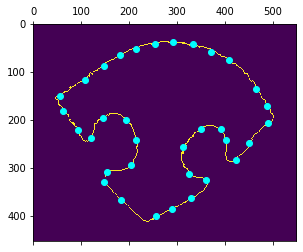

In [12]:
fig, ax = plt.subplots()
ax.matshow(boundaries)
corners = corner_peaks(corner_harris(boundaries, ), min_distance=20, num_peaks=50)
ax.plot(corners[:, 1], corners[:, 0], color='cyan', marker='o', linestyle='None', markersize=6)

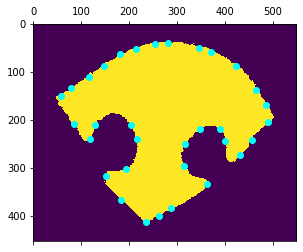

In [19]:
fig, ax = plt.subplots()
ax.matshow(cutout)
corners = corner_peaks(corner_harris(cutout), min_distance=20)
ax.plot(corners[:, 1], corners[:, 0], color='cyan', marker='o', linestyle='None', markersize=6)

In [58]:
ax.plot(corners)

In [63]:
corners.shape

(33, 2)

In [62]:
convex_hull_image(corners).shape

(33, 2)

In [59]:
corners

array([[ 58, 300],
       [ 66, 225],
       [113, 297],
       [132, 225],
       [149, 284],
       [156, 317],
       [156, 362],
       [160, 164],
       [165, 423],
       [181,  52],
       [215,  55],
       [241,  55],
       [241, 377],
       [256, 345],
       [272, 431],
       [283, 326],
       [288,  57],
       [324, 322],
       [336, 402],
       [347, 376],
       [390,  51],
       [390, 413],
       [439, 295],
       [440, 147],
       [443, 104],
       [444, 259],
       [458,  47],
       [458, 182],
       [478, 260],
       [508, 260],
       [513, 156],
       [538, 235],
       [542, 188]])

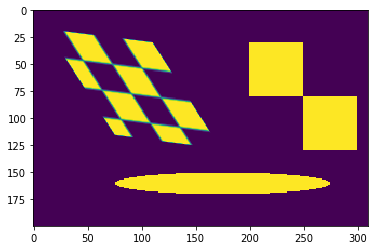

In [21]:
from matplotlib import pyplot as plt

from skimage import data
from skimage.feature import corner_harris, corner_subpix, corner_peaks
from skimage.transform import warp, AffineTransform
from skimage.draw import ellipse

# Sheared checkerboard
tform = AffineTransform(scale=(1.3, 1.1), rotation=1, shear=0.7,
                        translation=(110, 30))
image = warp(data.checkerboard()[:90, :90], tform.inverse,
             output_shape=(200, 310))
# Ellipse

rr, cc = ellipse(160, 175, 10, 100)
image[rr, cc] = 1
# Two squares
image[30:80, 200:250] = 1
image[80:130, 250:300] = 1
plt.imshow(image)

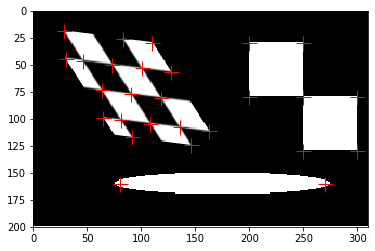

In [42]:
coords = corner_peaks(corner_harris(image), min_distance=5)
coords_subpix = corner_subpix(image, coords, window_size=13)

fig, ax = plt.subplots()
ax.imshow(image, cmap=plt.cm.gray)
ax.plot(coords[:, 1], coords[:, 0], color='cyan', marker='o',
        linestyle='None', markersize=6)
ax.plot(coords_subpix[:, 1], coords_subpix[:, 0], '+r', markersize=15)
ax.axis((0, 310, 200, 0))
plt.show()

In [24]:
coords[:5], coords_subpix[:5]

(array([[ 20,  30],
        [ 27,  85],
        [ 30, 110],
        [ 30, 200],
        [ 30, 249]]), array([[ 19.03251253,  28.60455845],
        [ 26.10663718,  83.14817505],
        [ 29.5284136 , 110.30130505],
        [ 29.51754386, 199.51754386],
        [ 29.51754386, 249.48245614]]))